In [1]:
# Use this cell to regroup all your imports
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import set_config; set_config(display='diagram')

# from python_files.data import GetData
# from python_files.basic_preprocessing import BasicPreprocessing
# from python_files.preprocessing import Advancedprocessing

import xgboost as xgb
import collections
from sklearn.decomposition import PCA

# Load

In [2]:
data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')

/tmp/ipykernel_5664/928083239.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')


In [3]:
data.isna().sum()/len(data)

id                             0.000000
budget                         0.000000
genres                         0.369306
imdb_id                        0.238487
original_language              0.000617
original_title                 0.000003
overview                       0.155217
popularity                     0.036241
production_companies           0.000000
production_countries           0.000000
release_date                   0.073072
revenue                        0.000000
runtime                        0.111805
spoken_languages               0.013553
status                         0.006041
tagline                        0.839140
title                          0.000003
vote_average                   0.000000
vote_count                     0.000000
production_companies_number    0.000000
production_countries_number    0.000000
spoken_languages_number        0.000000
actor1_name                    0.000000
actor1_gender                  0.000000
actor2_name                    0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329074 entries, 0 to 329073
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           329074 non-null  int64  
 1   budget                       329074 non-null  float64
 2   genres                       207545 non-null  object 
 3   imdb_id                      250594 non-null  object 
 4   original_language            328871 non-null  object 
 5   original_title               329073 non-null  object 
 6   overview                     277996 non-null  object 
 7   popularity                   317148 non-null  float64
 8   production_companies         329074 non-null  object 
 9   production_countries         329074 non-null  object 
 10  release_date                 305028 non-null  object 
 11  revenue                      329074 non-null  float64
 12  runtime                      292282 non-null  float64
 13 

In [5]:
data = data[data['revenue'] >3000]
data = data[data['revenue'] < 1519557910]

In [6]:
data = data[data['budget'] >30000]
data = data[data['budget'] < 260000000]

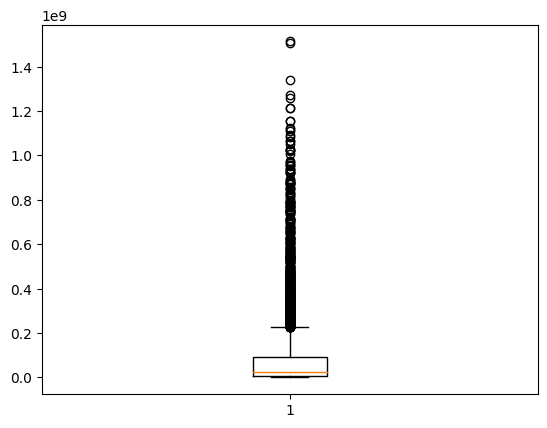

In [7]:
plt.boxplot(data['revenue']);

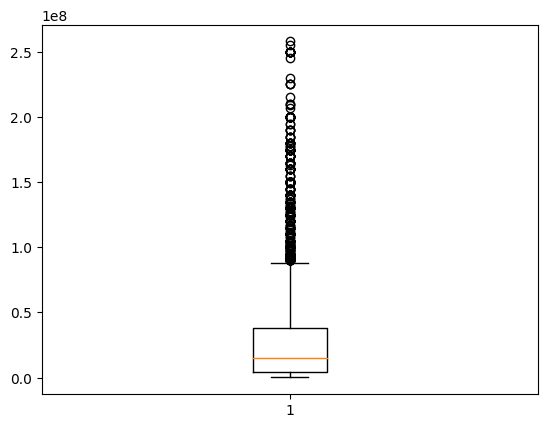

In [8]:
plt.boxplot(data['budget']);

In [9]:
data.shape

(5552, 41)

In [10]:
data[data['actor1_name']=="none"].head(1)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,belongs_to_collection
598,756,2280000.0,Animation|Family|Music,tt0032455,en,Fantasia,Walt Disney's timeless masterpiece is an extra...,2.834524,Walt Disney Pictures,United States of America,13/11/1940,83320000.0,124.0,English,Released,The most sensational sound you'll ever see!,Fantasia,7.1,728,1,1,1,none,0,Deems Taylor,0.0,Walt Disney,2,none,0,Julietta Novis,0,3,Samuel Armstrong,2.0,12,Walt Disney,1,none,Stephen Csillag,"{'id': 55427, 'name': 'Fantasia Collection', '..."


In [11]:
data.nunique()

id                             5547
budget                          763
genres                         1312
imdb_id                        5487
original_language                47
original_title                 5459
overview                       5489
popularity                     5524
production_companies           1507
production_countries             73
release_date                   3907
revenue                        5020
runtime                         168
spoken_languages                 55
status                            4
tagline                        4558
title                          5448
vote_average                     75
vote_count                     1673
production_companies_number      22
production_countries_number      11
spoken_languages_number          10
actor1_name                    2200
actor1_gender                     3
actor2_name                    3108
actor2_gender                     3
actor3_name                    3630
actor3_gender               

In [12]:
data.isnull().sum().sort_values(ascending=False)/len(data)

belongs_to_collection          0.787284
tagline                        0.175612
spoken_languages               0.012428
genres                         0.011527
imdb_id                        0.010807
overview                       0.009186
runtime                        0.004683
release_date                   0.002702
popularity                     0.001441
original_language              0.000180
director_name                  0.000000
actor3_gender                  0.000000
actor4_name                    0.000000
actor4_gender                  0.000000
actor5_name                    0.000000
actor5_gender                  0.000000
actor_number                   0.000000
director_gender                0.000000
screeplay_name                 0.000000
director_number                0.000000
editor_name                    0.000000
actor2_gender                  0.000000
producer_name                  0.000000
producer_number                0.000000
actor3_name                    0.000000


In [13]:
data.drop_duplicates(inplace = True)

In [14]:
round(data.corr(), 2)

/tmp/ipykernel_5664/216624331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(data.corr(), 2)


,id,budget,popularity,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,actor_number,director_gender,director_number,producer_number
id,1.00,-0.08,0.08,-0.04,-0.01,-0.17,-0.00,0.00,-0.04,-0.11,-0.32,-0.14,-0.19,-0.21,-0.21,0.00,-0.24,-0.05,-0.01
budget,-0.08,1.00,0.36,0.74,0.15,0.06,0.59,0.25,0.14,0.11,0.22,0.15,0.17,0.19,0.21,0.32,0.17,0.03,0.23
popularity,0.08,0.36,1.00,0.48,0.08,0.17,0.52,0.14,0.10,0.05,0.10,0.10,0.11,0.10,0.13,0.29,0.09,0.04,0.15
revenue,-0.04,0.74,0.48,1.00,0.15,0.17,0.76,0.15,0.05,0.08,0.15,0.12,0.12,0.13,0.16,0.36,0.13,0.05,0.14
runtime,-0.01,0.15,0.08,0.15,1.00,0.26,0.17,0.06,0.08,0.16,0.12,0.08,0.04,0.04,0.06,0.21,0.07,-0.06,0.09
vote_average,-0.17,0.06,0.17,0.17,0.26,1.00,0.28,0.12,0.09,0.14,0.21,0.14,0.12,0.11,0.13,0.21,0.15,0.05,0.13
vote_count,-0.00,0.59,0.52,0.76,0.17,0.28,1.00,0.21,0.09,0.09,0.17,0.13,0.13,0.15,0.16,0.42,0.15,0.04,0.21
production_companies_number,0.00,0.25,0.14,0.15,0.06,0.12,0.21,1.00,0.49,0.14,0.12,0.13,0.11,0.11,0.12,0.17,0.10,0.01,0.39
production_countries_number,-0.04,0.14,0.10,0.05,0.08,0.09,0.09,0.49,1.00,0.19,0.05,0.06,0.05,0.07,0.07,0.07,0.06,-0.00,0.19
spoken_languages_number,-0.11,0.11,0.05,0.08,0.16,0.14,0.09,0.14,0.19,1.00,0.11,0.07,0.05,0.06,0.06,0.08,0.06,0.05,0.10


In [15]:
data.drop(columns = ['imdb_id', 'status', 'spoken_languages'],inplace = True)

In [16]:
data.dropna( axis=0, how='any', subset=['release_date'], inplace= True )

In [17]:
data.shape

(5532, 38)

In [18]:
X = data.drop(columns=['revenue'])
y = data['revenue']

In [19]:
X.head().transpose()

,2,6,7,8,9
id,5,11,12,13,14
budget,4000000.0,11000000.0,94000000.0,55000000.0,15000000.0
genres,Crime|Comedy,Adventure|Action|Science Fiction,Animation|Family,Comedy|Drama|Romance,Drama
original_language,en,en,en,en,en
original_title,Four Rooms,Star Wars,Finding Nemo,Forrest Gump,American Beauty
overview,It's Ted the Bellhop's first night on the job....,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in..."
popularity,1.698,10.492614,9.915573,10.351236,8.191009
production_companies,Miramax Films,Lucasfilm,Pixar Animation Studios,Paramount Pictures,DreamWorks SKG
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America
release_date,25/12/1995,25/05/1977,30/05/2003,06/07/1994,15/09/1999


We know 2 main strategies to reduce the number of categorical features post-preprocessing:
- **[Remove](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** features that bring too little explanation to our model. This may require statistical analysis of feature importance 
- **[Ordinally encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (instead of one-hot-encode) categorical features into integers. However this forces a notion of "order" (1>2>3...) that can be detrimental if not set properly!

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
# X_test, X_val , y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50,random_state=6)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20,random_state=42)

In [21]:
!python --version

Python 3.8.12


In [22]:
X_train.shape

(3540, 37)

### 1.2 Baseline pipe

#### a) Preprocessing

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [24]:
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())

preproc_basic = make_column_transformer(
    (num_transformer, ['budget','runtime',
        'production_companies_number',
       'production_countries_number', 'spoken_languages_number']))

preproc_basic

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['budget', 'runtime',
                                  'production_companies_number',
                                  'production_countries_number',
                                  'spoken_languages_number'])])

#### b) Add estimator

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
pipe_baseline = make_pipeline(preproc_basic, LinearRegression())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['budget', 'runtime',
                                                   'production_companies_number',
                                                   'production_countries_number',
                                                   'spoken_languages_number'])])),
                ('linearregression', LinearRegression())])

#### c) Cross-Validate

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)
# Cross-validate Pipeline
score_baseline = cross_val_score(pipe_baseline, X_train, y_train, cv=5, scoring=rmse).mean()
score_baseline

102387015.3839834

## 🏋️‍♀️ 2. ITERATIONS 

**Estimators**

- **Tree-based ensembles (must try today)**: Probably the best suited for problems with many categorical features
- Stacking !
- XGBoost !

**Preprocessing** (once your first ensemble model works)

- Ordinal Encoding of categorical features with a hidden notion of order in their values (e.g. "bad", "average", good")
- Statistical Feature Selection to remove useless features (avoid overfitting and reduce train time)
- Predict `log(SalePrice)` instead?
- ...

### 2.1 Genre Addition ♲ 

In [28]:
from sklearn.base import TransformerMixin, BaseEstimator

class GenreTranformer(TransformerMixin, BaseEstimator): 
    # BaseEstimator generates the get_params() and set_params() methods that all Pipelines require
    # TransformerMixin creates the fit_transform() method from fit() and transform()
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.unique_genre_list = []
        for genres in X:
            for genre in genres[0].split('|'):
                if genre not in self.unique_genre_list:
                    self.unique_genre_list.append(genre)
        return self   
    
    def transform(self, X, y=None):
        unique_genre_list = self.unique_genre_list
        genre_transformed = [] 
        for genres in X:
            genre_np = np.zeros((len(unique_genre_list),), dtype=int)
            for target_genre in genres[0].split('|'):
                if target_genre in unique_genre_list:
                        index = unique_genre_list.index(target_genre)
                        genre_np[index] = 1
            genre_transformed.append(list(genre_np))
        return np.array(genre_transformed)

## Cast transformer

In [29]:
class CastTransformer(TransformerMixin, BaseEstimator): 
    # BaseEstimator generates the get_params() and set_params() methods that all Pipelines require
    # TransformerMixin creates the fit_transform() method from fit() and transform()
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
#         for feature_number in range(X.shape[1]):
#         def top_k(feature, k):
#         feature_top_k = np.partition(X[:,0], -k)[-k:]
#         self.popular_actor_list = np.sort(feature_top_k)[::-1]
        return self   
    
    def transform(self, X, y=None):
        popular_actor_list = ['Nicolas Cage',
  'Johnny Depp',
  'Ajith Kumar',
  'Bruce Willis',
  'Tom Cruise',
  'Denzel Washington',
  'Tom Hanks',
  'Adam Sandler',
  'Robert De Niro',
  'John Travolta',
  'Eddie Murphy',
  'John Wayne',
  'Keanu Reeves',
  'Arnold Schwarzenegger',
  'Ben Affleck',
  'Jeff Bridges',
  'George Clooney',
  'Harrison Ford',
  'Matt Damon',
  'Liam Neeson',
  'Kevin Costner',
  'Mark Wahlberg',
  'Clint Eastwood',
  'Jason Statham',
  'Mel Gibson',
  'Jackie Chan',
  'Sylvester Stallone',
  'Meryl Streep',
  'Ben Stiller',
  'Christian Bale']
        popular_director_list = ['Steven Spielberg',
  'Woody Allen',
  'Ridley Scott',
  'Alfred Hitchcock',
  'Clint Eastwood',
  'Steven Soderbergh',
  'Oliver Stone',
  'Martin Scorsese',
  'Robert Rodriguez',
  'John Carpenter',
  'Tim Burton',
  'John Ford',
  'Wes Craven',
  'Francis Ford Coppola',
  'Ron Howard',
  'Roland Emmerich',
  'Robert Zemeckis',
  'Michael Bay',
  'Billy Wilder',
  'Bobby Farrelly',
  'Renny Harlin',
  'Sam Raimi',
  'Peter Jackson',
  'Walter Hill',
  'Tony Scott',
  'Richard Donner',
  'Brian De Palma',
  'Barry Levinson',
  'Spike Lee',
  'John Landis']
        popular_producer_list = ['Joel Silver',
  'Jerry Bruckheimer',
  'Brian Grazer',
  'Neal H. Moritz',
  'Tim Bevan',
  'Luc Besson',
  'John Davis',
  'Michael Bay',
  'Scott Rudin',
  'Arnon Milchan',
  'Danny DeVito',
  'Clint Eastwood',
  'Roger Birnbaum',
  'Ridley Scott',
  'Charles Roven',
  'Steve Golin',
  'Ronnie Screwvala',
  'Albert R. Broccoli',
  'Lawrence Gordon',
  'Walt Disney',
  'Tom Rosenberg',
  'Gale Anne Hurd',
  'Alfred Hitchcock',
  'Lawrence Bender',
  'Kathleen Kennedy',
  'Nick Wechsler',
  'Steven Spielberg',
  'John Hughes',
  'Judd Apatow',
  'Robert Rodriguez']
        popular_prod_company_list = ['Universal Pictures',
  'Paramount Pictures',
  'Twentieth Century Fox Film Corporation',
  'Columbia Pictures',
  'New Line Cinema',
  'Walt Disney Pictures',
  'Warner Bros.',
  'Metro-Goldwyn-Mayer (MGM)',
  'United Artists',
  'Columbia Pictures Corporation',
  'Miramax Films',
  'TriStar Pictures',
  'Village Roadshow Pictures',
  'DreamWorks SKG',
  'Fox Searchlight Pictures',
  'Summit Entertainment',
  'Touchstone Pictures',
  'Orion Pictures',
  'Lions Gate Films',
  'BBC Films',
  'Lionsgate',
  'Imagine Entertainment',
  'The Weinstein Company',
  'Regency Enterprises',
  'RKO Radio Pictures',
  'Hollywood Pictures',
  'Lakeshore Entertainment',
  'StudioCanal',
  'Lucasfilm',
  'Dimension Films']
        prod_country_list = ['United States of America',
  'United Kingdom',
  'India',
  'France',
  'Germany',
  'Canada',
  'Australia',
  'Russia',
  'Japan',
  'Italy',
  'China',
  'Spain',
  'Ireland',
  'Hong Kong',
  'South Korea',
  'Mexico',
  'Belgium',
  'New Zealand',
  'Czech Republic',
  'Denmark',
  'Netherlands',
  'Switzerland',
  'Singapore',
  'Israel',
  'Brazil',
  'Thailand',
  'United Arab Emirates',
  'Norway',
  'Sweden',
  'Finland']
        actor_transformed = []
        prod_country_transformed = []
        director_transformed = []
        producer_transformed = []
        production_company_transformed = []

        for (actor1,actor2) in X.iloc[:,:2].values:
            actor_np = np.zeros((30,), dtype=int)
            if actor1 in popular_actor_list:
                index = popular_actor_list.index(actor1)
                actor_np[index] = 1
            if actor2 in popular_actor_list:
                index = popular_actor_list.index(actor2)
                actor_np[index] = 1
            actor_transformed.append(list(actor_np))
        for director in X.iloc[:,2].values:
            director_np = np.zeros((30,), dtype=int)
            if director in popular_director_list:
                        index = popular_director_list.index(director)
                        director_np[index] = 1
            director_transformed.append(list(director_np))
        for producer in X.iloc[:,3].values:
            producer_np = np.zeros((30,), dtype=int)
            if producer in popular_producer_list:
                        index = popular_producer_list.index(producer)
                        producer_np[index] = 1
            producer_transformed.append(list(producer_np))
        for prod_country in X.iloc[:,4].values:
            prod_country_np = np.zeros((30,), dtype=int)
            if prod_country in prod_country_list:
                        index = prod_country_list.index(prod_country)
                        prod_country_np[index] = 1
            prod_country_transformed.append(list(prod_country_np))
        for pc in X.iloc[:,5].values:
            production_company_np = np.zeros((30,), dtype=int)
            if pc in popular_prod_company_list:
                        index = popular_prod_company_list.index(pc)
                        production_company_np[index] = 1
            production_company_transformed.append(list(production_company_np))
        return np.concatenate((actor_transformed,director_transformed,producer_transformed,production_company_transformed,prod_country_transformed),axis = 1)

In [30]:
# np_arr = [['Julia Stiles','Sean Patrick Thomas','Thomas Carter', 'David Madden',
#   'United States of America' ,'MTV Films'],
#  ['Jeremy Irvine', 'Colin Firth' ,'Jonathan Teplitzky', 'Chris Brown',
#   'Australia' ,'Archer Street Productions']]

# for (a,b) in np_arr[:,:2]:
#     print(a)
#     print(b)

In [31]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
import datetime

class DataframeTransformer:
    @staticmethod
    def names(X):
        return list(X_train.columns)
    
    @staticmethod
    def _has_collection(x):
        if pd.isnull(x):
            return 0
        return 1

    @staticmethod
    def transformer(X):
        
        X['release_date'] = pd.to_datetime(X['release_date'],infer_datetime_format=True)
        X['belongs_to_collection_updated'] = X['belongs_to_collection'].apply(DataframeTransformer._has_collection)
        # add weekday
        X['release_weekday'] = X['release_date'].dt.day_name()
        #Log of budget
#         X['log_budget'] = np.log(X['budget'])
        #find age of movie
        now = pd.to_datetime('now')
        X['release_age'] = (now - X['release_date']).astype('<m8[Y]')

        X['week_sin'] = np.sin(2 * np.pi * X['release_date'].dt.isocalendar().week/52)

        X['week_cos'] = np.cos(2 * np.pi * X['release_date'].dt.isocalendar().week/52)
        
        #budget to year ratio
        X['budget_year_ratio'] = round(X['budget']/X['release_date'].dt.year, 2)
        return X

In [32]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
cast_transformer = make_pipeline(CastTransformer())
cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore',sparse=False,drop='if_binary'))
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())
cyclic_transformer = make_pipeline(SimpleImputer(strategy='mean'))
genre_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), GenreTranformer())

basic_prepoc_steps = FunctionTransformer(DataframeTransformer.transformer)

processing_pipeline = ColumnTransformer([
    ('Numerical Features Transformer',num_transformer, ['runtime', 'release_age', 'production_companies_number', 'production_countries_number', 'popularity', 'vote_average', 'vote_count',
                                                        'actor_number', 'director_number', 'producer_number', 'budget_year_ratio']),
    ('Cyclic Transformer',cyclic_transformer,['week_cos','week_sin']),
    ('Category_Transformer', cat_transformer, [ 'belongs_to_collection_updated']),
    ('Genres Transformer',genre_transformer,['genres']),
    ('Cast Transformer',cast_transformer,['actor1_name','actor2_name','director_name','producer_name','production_companies','production_countries'] )

])
feature_selector = SelectPercentile(
    mutual_info_regression,
    percentile=25, # keep only 25% of all features
)


union = Pipeline([
    ('basic_prepoc',basic_prepoc_steps),
    ('processing_pipeline', processing_pipeline),
#     ('select percentile',feature_selector)
#     ('linear_reg',LinearRegression())
])
union

Pipeline(steps=[('basic_prepoc',
                 FunctionTransformer(func=<function DataframeTransformer.transformer at 0x7fbf2e626e50>)),
                ('processing_pipeline',
                 ColumnTransformer(transformers=[('Numerical Features '
                                                  'Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['runtime', 'release_age',
                                                   'production_companies_number',
                                                   'pro...
                                                  ['belongs_to_collection_updated']),
                                                 ('Genres Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('genretranformer',
                                                                   GenreTranformer())]),
                                                  ['genres']),
                                                 ('Cast Transformer',
                                                  Pipeline(steps=[('casttransformer',
                                                                   CastTransformer())]),
                                                  ['actor1_name', 'actor2_name',
                                                   'director_name',
                                                   'producer_name',
                                                   'production_companies',
                                                   'production_countries'])]))])

In [33]:
X_train.head()

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,belongs_to_collection
5023,9816,13000000.0,Drama|Family|Romance|Music,en,Save the Last Dance,"A white midwestern girl moves to Chicago, wher...",0.838506,MTV Films,United States of America,12/01/2001,112.0,The Only Person You Need To Be Is Yourself.,Save the Last Dance,6.3,324,2,1,1,Julia Stiles,1,Sean Patrick Thomas,2.0,Kerry Washington,1,Fredro Starr,2,Terry Kinney,2,21,Thomas Carter,2.0,1,David Madden,5,none,Jeff Canavan,"{'id': 107469, 'name': 'Save The Last Dance Co..."
83633,127560,18000000.0,Drama|History,en,The Railway Man,"A victim from World War II's ""Death Railway"" s...",1.279854,Archer Street Productions,Australia,26/12/2013,116.0,Revenge is never a straight line.,The Railway Man,6.8,261,6,2,1,Jeremy Irvine,2,Colin Firth,2.0,Stellan Skarsgård,2,Michael MacKenzie,0,Nicole Kidman,1,34,Jonathan Teplitzky,0.0,1,Chris Brown,3,Frank Cottrell Boyce,none,NaN
989,1496,6000000.0,Drama|Action|Comedy|Music|Romance,en,Cool as Ice,"Johnny, a freewheeling, motorcycle-riding musi...",0.159195,Universal Pictures,United States of America,18/10/1991,91.0,"When a girl has a heart of stone, there's only...",Cool as Ice,4.7,26,4,1,1,Vanilla Ice,2,Kristin Minter,1.0,Naomi Campbell,1,Deezer D,2,Kevin Hicks,2,10,David Kellogg,2.0,1,Lionel Wigram,2,none,Debra Goldfield,NaN
2980,5156,133000.0,Drama,it,Ladri di biciclette,"Antonio, an unemployed man in the depressed po...",1.624739,Produzioni De Sica,Italy,24/11/1948,93.0,A man and his son search for a stolen bicycle ...,Bicycle Thieves,8.0,353,1,1,1,Lamberto Maggiorani,0,Enzo Staiola,1.0,Lianella Carell,0,Gino Saltamerenda,0,Vittorio Antonucci,0,20,Vittorio De Sica,2.0,1,Giuseppe Amato,2,Cesare Zavattini,Eraldo Da Roma,NaN
26443,40952,20000000.0,Horror|Thriller,en,Alone in the Dark,A quartet of murderous psychopaths break out o...,0.166398,New Line Cinema,United States of America,12/11/1982,93.0,Too frightened to breathe...,Alone in the Dark,5.5,25,2,1,2,Jack Palance,2,Donald Pleasence,2.0,Martin Landau,2,Dwight Schultz,2,Erland van Lidth,0,15,Jack Sholder,2.0,1,Robert Shaye,1,Jack Sholder,Arline Garson,NaN


In [34]:
columns_df = [
'runtime', 'release_age', 'production_companies_number', 'production_countries_number', 'popularity', 'vote_average', 'vote_count',
'actor_number', 'director_number', 'producer_number', 'budget_year_ratio','week_cos','week_sin','belongs_to_collection_updated',
'genre_Drama',
'genre_Family',
'genre_Romance',
'genre_Music',
'genre_History',
'genre_Action',
'genre_Comedy',
'genre_Horror',
'genre_Thriller',
'genre_War',
'genre_Adventure',
'genre_Documentary',
'genre_Foreign',
'genre_Fantasy',
'genre_Crime',
'genre_Animation',
'genre_Science Fiction',
'genre_Mystery',
'genre_Western',
'genre_TV Movie',
'actor_Nicolas Cage',
'actor_Johnny Depp',
'actor_Ajith Kumar',
'actor_Bruce Willis',
'actor_Tom Cruise',
'actor_Denzel Washington',
'actor_Tom Hanks',
'actor_Adam Sandler',
'actor_Robert De Niro',
'actor_John Travolta',
'actor_Eddie Murphy',
'actor_John Wayne',
'actor_Keanu Reeves',
'actor_Arnold Schwarzenegger',
'actor_Ben Affleck',
'actor_Jeff Bridges',
'actor_George Clooney',
'actor_Harrison Ford',
'actor_Matt Damon',
'actor_Liam Neeson',
'actor_Kevin Costner',
'actor_Mark Wahlberg',
'actor_Clint Eastwood',
'actor_Jason Statham',
'actor_Mel Gibson',
'actor_Jackie Chan',
'actor_Sylvester Stallone',
'actor_Meryl Streep',
'actor_Ben Stiller',
'actor_Christian Bale',
'director_Steven Spielberg',
'director_Woody Allen',
'director_Ridley Scott',
'director_Alfred Hitchcock',
'director_Clint Eastwood',
'director_Steven Soderbergh',
'director_Oliver Stone',
'director_Martin Scorsese',
'director_Robert Rodriguez',
'director_John Carpenter',
'director_Tim Burton',
'director_John Ford',
'director_Wes Craven',
'director_Francis Ford Coppola',
'director_Ron Howard',
'director_Roland Emmerich',
'director_Robert Zemeckis',
'director_Michael Bay',
'director_Billy Wilder',
'director_Bobby Farrelly',
'director_Renny Harlin',
'director_Sam Raimi',
'director_Peter Jackson',
'director_Walter Hill',
'director_Tony Scott',
'director_Richard Donner',
'director_Brian De Palma',
'director_Barry Levinson',
'director_Spike Lee',
'director_John Landis',
'producer_Joel Silver',
'producer_Jerry Bruckheimer',
'producer_Brian Grazer',
'producer_Neal H. Moritz',
'producer_Tim Bevan',
'producer_Luc Besson',
'producer_John Davis',
'producer_Michael Bay',
'producer_Scott Rudin',
'producer_Arnon Milchan',
'producer_Danny DeVito',
'producer_Clint Eastwood',
'producer_Roger Birnbaum',
'producer_Ridley Scott',
'producer_Charles Roven',
'producer_Steve Golin',
'producer_Ronnie Screwvala',
'producer_Albert R. Broccoli',
'producer_Lawrence Gordon',
'producer_Walt Disney',
'producer_Tom Rosenberg',
'producer_Gale Anne Hurd',
'producer_Alfred Hitchcock',
'producer_Lawrence Bender',
'producer_Kathleen Kennedy',
'producer_Nick Wechsler',
'producer_Steven Spielberg',
'producer_John Hughes',
'producer_Judd Apatow',
'producer_Robert Rodriguez',
'productionCompany_Universal Pictures',
'productionCompany_Paramount Pictures',
'productionCompany_Twentieth Century Fox Film Corporation',
'productionCompany_Columbia Pictures',
'productionCompany_New Line Cinema',
'productionCompany_Walt Disney Pictures',
'productionCompany_Warner Bros.',
'productionCompany_Metro-Goldwyn-Mayer (MGM)',
'productionCompany_United Artists',
'productionCompany_Columbia Pictures Corporation',
'productionCompany_Miramax Films',
'productionCompany_TriStar Pictures',
'productionCompany_Village Roadshow Pictures',
'productionCompany_DreamWorks SKG',
'productionCompany_Fox Searchlight Pictures',
'productionCompany_Summit Entertainment',
'productionCompany_Touchstone Pictures',
'productionCompany_Orion Pictures',
'productionCompany_Lions Gate Films',
'productionCompany_BBC Films',
'productionCompany_Lionsgate',
'productionCompany_Imagine Entertainment',
'productionCompany_The Weinstein Company',
'productionCompany_Regency Enterprises',
'productionCompany_RKO Radio Pictures',
'productionCompany_Hollywood Pictures',
'productionCompany_Lakeshore Entertainment',
'productionCompany_StudioCanal',
'productionCompany_Lucasfilm',
'productionCompany_Dimension Films',
'productionCountry_United States of America',
'productionCountry_United Kingdom',
'productionCountry_India',
'productionCountry_France',
'productionCountry_Germany',
'productionCountry_Canada',
'productionCountry_Australia',
'productionCountry_Russia',
'productionCountry_Japan',
'productionCountry_Italy',
'productionCountry_China',
'productionCountry_Spain',
'productionCountry_Ireland',
'productionCountry_Hong Kong',
'productionCountry_South Korea',
'productionCountry_Mexico',
'productionCountry_Belgium',
'productionCountry_New Zealand',
'productionCountry_Czech Republic',
'productionCountry_Denmark',
'productionCountry_Netherlands',
'productionCountry_Switzerland',
'productionCountry_Singapore',
'productionCountry_Israel',
'productionCountry_Brazil',
'productionCountry_Thailand',
'productionCountry_United Arab Emirates',
'productionCountry_Norway',
'productionCountry_Sweden',
'productionCountry_Finland',


]

In [35]:
# corr_num = X_train_transformed[['log_budget','release_age','runtime','production_companies_number','production_countries_number', 'spoken_languages_number','actor_number','producer_number','director_number','week_cos','week_sin']].corr()
# plt.figure(figsize=(7,5))
# sns.heatmap(corr_num, cmap='coolwarm',vmin=-1, vmax=1);


In [36]:
# # Converting the correlation matrix into a DataFrame
# corr_df = corr_num.stack().reset_index()

# # Renaming the columns
# corr_df.columns = ['feature_1','feature_2', 'correlation']

# # Remove "self correlations"
# no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
# corr_df = corr_df[no_self_correlation]
# # Computing the absolute correlation
# corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# # Showing the top 5 most correlated pairs of feature
# corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

In [37]:
X_train_transformed = pd.DataFrame(union.fit_transform(X_train),columns=columns_df)
X_val_transformed = pd.DataFrame(union.transform(X_val),columns=columns_df)
X_test_transformed = pd.DataFrame(union.transform(X_test),columns=columns_df)

/tmp/ipykernel_5664/2438466784.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  X['release_date'] = pd.to_datetime(X['release_date'],infer_datetime_format=True)
/tmp/ipykernel_5664/2438466784.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')
/tmp/ipykernel_5664/2438466784.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')
/tmp/ipykernel_5664/2438466784.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
 

In [38]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# pca_x_train = pca.fit_transform(X_train_transformed)
# pca_x_val = pca.transform(X_val_transformed)
# pca_x_test = pca.transform(X_test_transformed)
# pca.explained_variance_ratio_

In [39]:
y_train_transformed = y_train.apply(lambda x: np.log(1+x))
y_val_transformed = y_val.apply(lambda x: np.log(1+x))
y_test_transformed = y_test.apply(lambda x: np.log(1+x))

## Models

**XGB Regresssor**

In [40]:
from xgboost import XGBRegressor

In [41]:
pca = PCA(n_components=50)
model_xgb = XGBRegressor(max_depth=6, n_estimators=1000, learning_rate=0.01, reg_alpha = 0 , subsample = 0.5, min_child_weight = 6, colsample_bytree = 1 )

In [42]:
pipe_xgb = make_pipeline(union, model_xgb)
pipe_xgb

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('basic_prepoc',
                                  FunctionTransformer(func=<function DataframeTransformer.transformer at 0x7fbf2e626e50>)),
                                 ('processing_pipeline',
                                  ColumnTransformer(transformers=[('Numerical '
                                                                   'Features '
                                                                   'Transformer',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   ['runtime',
                                                                    'release_age',
                                                                    'pro...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=6,
                              missing=nan, monotone_constraints=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [43]:
pipe_xgb.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('basic_prepoc',
                    FunctionTransformer(func=<function DataframeTransformer.transformer at 0x7fbf2e626e50>)),
                   ('processing_pipeline',
                    ColumnTransformer(transformers=[('Numerical Features '
                                                     'Transformer',
                                                     Pipeline(steps=[('simpleimputer',
                                                                      SimpleImputer()),
                                                                     ('robustscaler',
                                                                      RobustScaler())]),
                                                     ['runtime', 'release_age',
                                                      'production_companies_number',
                                                      'pro...
                                                     

In [44]:
pipe_xgb.fit(X_train,y_train_transformed)

/tmp/ipykernel_5664/2438466784.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('basic_prepoc',
                                  FunctionTransformer(func=<function DataframeTransformer.transformer at 0x7fbf2e626e50>)),
                                 ('processing_pipeline',
                                  ColumnTransformer(transformers=[('Numerical '
                                                                   'Features '
                                                                   'Transformer',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   ['runtime',
                                                                    'release_age',
                                                                    'pro...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.01,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=6,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, ...))])

In [45]:
import pickle


# Export Pipeline as pickle file
pickle.dump(pipe_xgb,open('../model/xgb_model2.pkl', 'wb'))

In [46]:
# # Load Pipeline from pickle file
my_pipeline = pickle.load(open("../model/xgb_model2.pkl","rb"))

In [47]:
q1 = X_test['budget'].quantile(0.25)
q3 = X_test['budget'].quantile(0.75)
iqr = q3 - q1

In [48]:
df_test_merge = pd.merge(X_test,y_test_transformed,left_index=True, right_index=True)
df_test_merge

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,belongs_to_collection,belongs_to_collection_updated,release_weekday,release_age,week_sin,week_cos,budget_year_ratio,revenue
21145,33408,6000000.0,Drama|Thriller,en,The Crush,A precocious and obsessive teenager develops a...,1.447610,Warner Bros.,United States of America,1993-02-04,89.0,He thought it was just a crush. He was dead wr...,The Crush,5.6,58,2,1,1,Cary Elwes,2,Alicia Silverstone,0.0,Jennifer Rubin,1,Kurtwood Smith,2,none,0,13,Alan Shapiro,2.0,1,James G. Robinson,1,none,Ian Crafford,NaN,0,Thursday,29.0,0.568065,0.822984,3010.54,16.426271
126892,219343,79000.0,Fantasy|Romance|Thriller,kn,ಲೂಸಿಯಾ,A man suffering from insomnia is tricked into ...,0.076253,none,India,2013-10-19,136.0,NaN,Lucia,6.8,10,0,1,1,none,0,Sathish Ninasam,0.0,Sruthi Hariharan,1,Achyuth Kumar,2,none,0,9,Pawan Kumar,2.0,1,Suresh Kanchusthambham,8,none,Pawan Kumar,NaN,0,Saturday,9.0,-0.935016,0.354605,39.24,12.043560
5347,10184,40000000.0,Comedy|Romance|Drama,en,He's Just Not That Into You,Remember that really cute guy who said he'd ca...,1.518172,New Line Cinema,Netherlands,2009-06-02,129.0,Are you the exception...or the rule?,He's Just Not That Into You,6.2,876,3,3,1,Ben Affleck,2,Jennifer Aniston,1.0,Drew Barrymore,1,Jennifer Connelly,1,Kevin Connolly,2,41,Ken Kwapis,0.0,1,none,0,none,none,NaN,0,Tuesday,13.0,0.354605,-0.935016,19910.40,18.993125
229624,350650,46597700.0,Comedy|Animation|Family|Adventure|Science Fict...,ja,ドラえもん のび太の宇宙英雄記（スペースヒーローズ）,"One day Doraemon, Nobita, Shizuka, Gian and Su...",0.314991,Shin-Ei Animation,Japan,2015-07-03,100.0,NaN,Doraemon: Nobita and the Space Heroes,7.5,5,1,1,1,none,0,Wasabi Mizuta,1.0,Megumi Ohara,0,Yumi Kazaku,0,Subaru Kimura,2,22,Yoshihiro Osugi,0.0,1,none,0,none,none,NaN,0,Friday,7.0,-0.120537,-0.992709,23125.41,17.302886
5091,9907,51000000.0,Animation|Comedy|Family,en,Barnyard,"When things get crazy at the farm, it's up to ...",1.422142,Paramount Pictures,Germany,2006-04-08,90.0,What happens in the barn stays in the barn,Barnyard,5.2,194,3,2,1,Courteney Cox,1,Kevin James,2.0,Sam Elliott,2,Danny Glover,2,Wanda Sykes,0,20,Steve Oedekerk,2.0,1,Steve Oedekerk,5,none,Paul D. Calder,NaN,0,Saturday,16.0,0.992709,-0.120537,25423.73,18.102938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122074,209901,3000000.0,Horror,en,Nothing Left to Fear,Nothing Left to Fear was inspired by the legen...,0.523565,Anchor Bay Films,United States of America,2013-09-26,100.0,Let Us Prey.,Nothing Left to Fear,4.6,57,7,1,1,Clancy Brown,2,James Tupper,0.0,Anne Heche,1,Ethan Peck,2,Jennifer Stone,1,14,Anthony Leonardi III,0.0,1,none,0,none,Howard E. Smith,NaN,0,Thursday,9.0,-1.0,-0.0,1490.31,14.331552
7035,12177,62000000.0,Comedy|Romance,en,The Love Guru,Born in America and raised in an Indian ashram...,2.038497,Paramount Pictures,United States of America,2008-06-20,87.0,His Karma is Huge,The Love Guru,4.3,227,3,3,1,Mike Myers,2,Jessica Alba,1.0,Justin Timberlake,2,Romany Malco,2,Meagan Good,1,19,Marco Schnabel,2.0,1,Michael De Luca,2,Mike Myers,Billy Weber,NaN,0,Friday,14.0,0.120537,-0.992709,30876.49,17.548863
8714,14578,7000000.0,Romance|Comedy|Drama,en,Outside Providence,"In this coming-of-age comedy, Tim Dunphy is le...",0.374228,Miramax Films,United States of America,1999-08-16,96.0,Tim's getting a future... whether he likes it ...,Outside Providence,5.6,28,2,1,1,Shawn Hatosy,2,Amy Smart,1.0,Alec Baldwin,2,Jo

In [49]:
X_test_q1 = X_test[X_test['budget'] < q1]
X_test_q3 = X_test[X_test['budget'] > q3]
X_test_iqr = X_test[X_test['budget'] > q1]
X_test_iqr = X_test_iqr[X_test_iqr['budget'] < q3]

In [50]:
y_test_q1 = df_test_merge[df_test_merge['budget'] < q1]['revenue']
y_test_q3 = df_test_merge[df_test_merge['budget'] > q3]['revenue']
y_test_iqr = df_test_merge[df_test_merge['budget'] > q1]
y_test_iqr = y_test_iqr[df_test_merge['budget'] < q3]['revenue']

/tmp/ipykernel_5664/37040515.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_test_iqr = y_test_iqr[df_test_merge['budget'] < q3]['revenue']


In [51]:
y_pred = my_pipeline.predict(X_test)
y_pred_q1 = my_pipeline.predict(X_test_q1)
y_pred_iqr = my_pipeline.predict(X_test_iqr)
y_pred_q3 = my_pipeline.predict(X_test_q3)

/tmp/ipykernel_5664/2438466784.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')
/tmp/ipykernel_5664/2438466784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['release_date'] = pd.to_datetime(X['release_date'],infer_datetime_format=True)
/tmp/ipykernel_5664/2438466784.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['belongs_to_collection_updated'

In [52]:
y_pred[0]

15.49826

In [73]:
def print_metric(y_test, y_pred):
    print('R2 score: ', r2_score(np.expm1(y_test), np.expm1(y_pred)) )
    print("RMSE score: ", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
    diff = np.expm1(y_test) - np.expm1(y_pred)
    diff_per = (diff * 100) / np.expm1(y_test)
    print("Mean of difference between test and predicted: ",  diff.mean())
    print("Mean of %diff between test and predicted: ", diff_per.mean())

In [74]:
print_metric(y_test_transformed, y_pred)

R2 score:  0.7395093456505442
RMSE score:  78794426.50694786
Mean of difference between test and predicted:  17880745.105302908
Mean of %diff between test and predicted:  -238.63409281490465


### Low Budget Movies

In [75]:
print_metric(y_test_q1, y_pred_q1)

R2 score:  0.36883891167505345
RMSE score:  16661214.825232409
Mean of difference between test and predicted:  4774605.129653655
Mean of %diff between test and predicted:  -366.87936174488226


### High Budget Movies

In [76]:
print_metric(y_test_q3, y_pred_q3)

R2 score:  0.6702569259904425
RMSE score:  144407488.48307192
Mean of difference between test and predicted:  41484248.731199205
Mean of %diff between test and predicted:  -48.67150597696979


### Mid Budget Movies

In [77]:
print_metric(y_test_iqr, y_pred_iqr)

R2 score:  0.4686086438890702
RMSE score:  45060959.12485405
Mean of difference between test and predicted:  11744820.139303774
Mean of %diff between test and predicted:  -276.12025490031544


In [52]:
# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
mse = mean_squared_error(y_test_transformed, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_transformed, y_pred)
rsquared = r2_score(y_test_transformed, y_pred)
max_error = max_error(y_test_transformed, y_pred)
print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 1.36
RMSE = 1.17
MAE = 0.82
R2 = 0.7
Max Error = 6.25


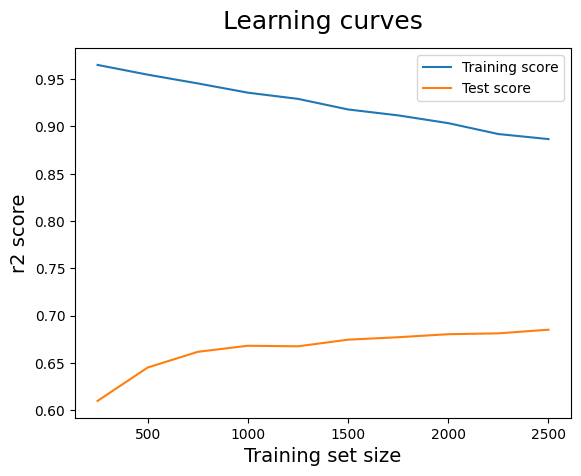

In [53]:
from sklearn.model_selection import learning_curve
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(estimator=XGBRegressor(learning_rate=0.01, n_estimators=1000,
                                                                                max_depth=6, min_child_weight=6,
                                                                                subsample=0.5,
                                                                                colsample_bytree=1,
                                                                                nthread=-1, alpha = 0), 
                                                        X=X_train_transformed, 
                                                        y=y_train_transformed, 
                                                        train_sizes=train_sizes, 
                                                        cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [54]:
comp_df = pd.DataFrame({"actual": np.expm1(y_test_transformed), "predictions": np.expm1(y_pred)})
# Add actual values to dataframe
# comp_df['actual'] = np.expm1(y_cross)
# Add column with difference of the two values
comp_df['difference'] = comp_df['predictions'] - comp_df['actual']
# Add column that shows the percent difference between predicted and actual value
comp_df['percent_diff'] = abs(abs(comp_df['predictions'] / (comp_df['actual'])) - 1) * 100
# Add column that designates a difference of less than 20% as 'okay' and 20% or more as 'bad'
comp_df['okay'] = comp_df['percent_diff'].apply(lambda x: 'okay' if x < 20 else 'bad')
comp_df

,actual,predictions,difference,percent_diff,okay
21145,13609396.0,5.094460e+06,-8.514936e+06,62.566594,bad
126892,170000.0,9.169622e+05,7.469622e+05,439.389559,bad
5347,177259441.0,1.359708e+08,-4.128859e+07,23.292747,bad
229624,32700000.0,4.264504e+06,-2.843550e+07,86.958703,bad
5091,72779000.0,5.826056e+07,-1.451844e+07,19.948667,okay
...,...,...,...,...,...
122074,1675381.0,1.806948e+06,1.315669e+05,7.852953,okay
7035,41819064.0,3.686381e+07,-4.955252e+06,11.849266,okay
8714,7292175.0,4.032303e+06,-3.259872e+06,44.703703,bad
3971,7266209.0,2.312253e+07,1.585632e+07,218.219941,bad


In [55]:
comp_df[comp_df['okay']=='okay'].shape

(229, 5)

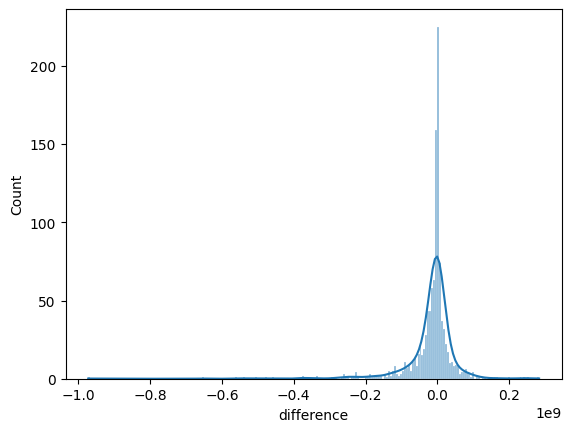

In [56]:
sns.histplot(comp_df['difference'], kde=True, edgecolor='w');

In [57]:
comp_df['percent_diff'].describe()

count     1107.000000
mean       293.824904
std       2057.735181
min          0.023156
25%         26.395672
50%         51.223792
75%         84.736726
max      51808.264553
Name: percent_diff, dtype: float64

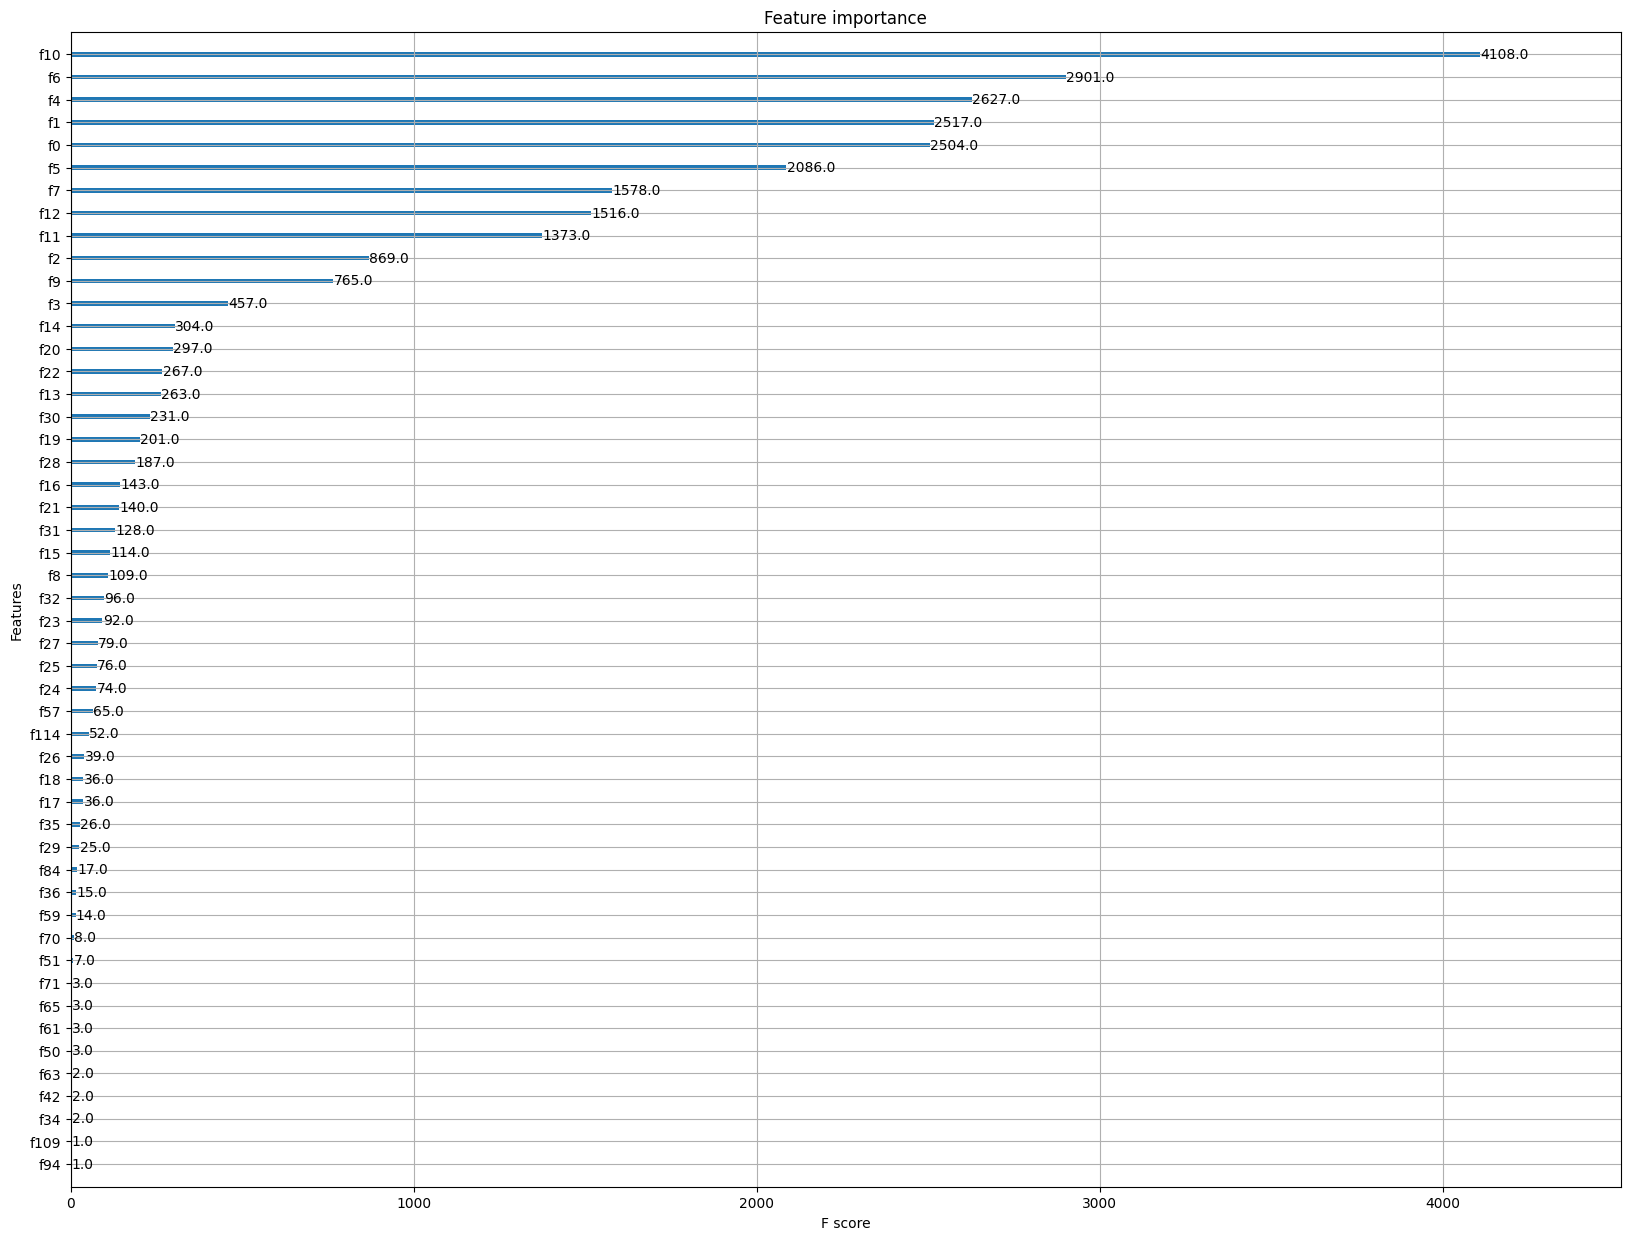

In [58]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(20, 15))
xgb.plot_importance(model_xgb, max_num_features=50, importance_type='weight', ax=ax);

<AxesSubplot: ylabel='actual'>

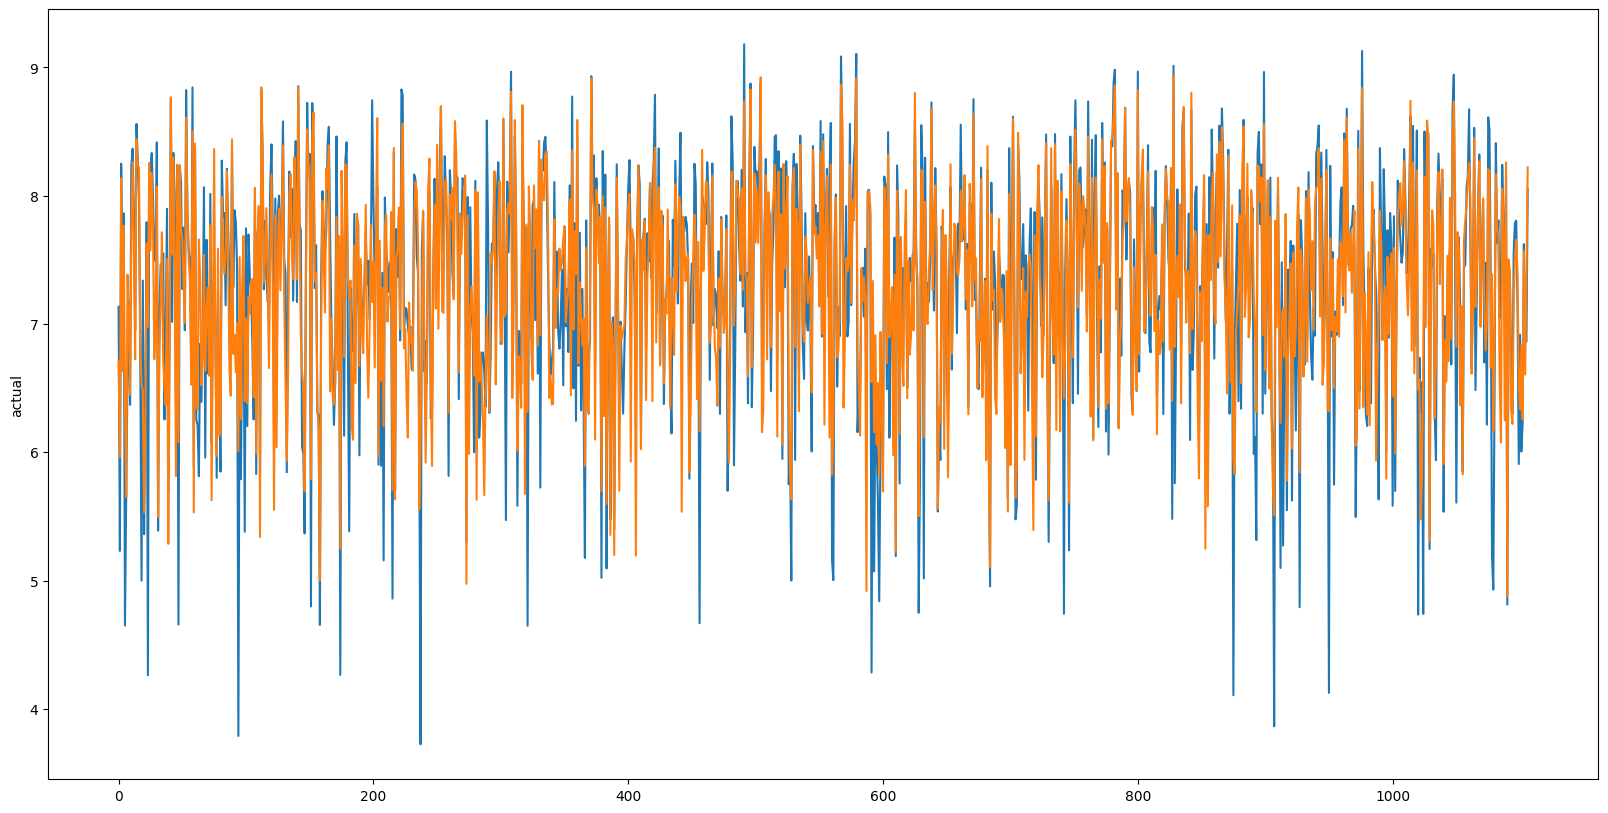

In [59]:
plt.figure(figsize=(20, 10))
sns.lineplot(y=np.log10(comp_df['actual']), x=range(len(comp_df)))
sns.lineplot(y=np.log10(comp_df['predictions']), x=range(len(comp_df)))

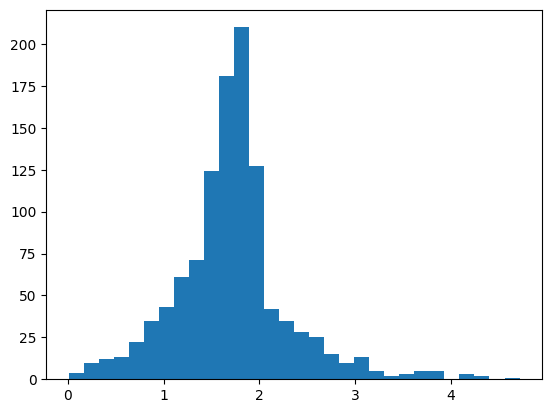

In [60]:
_ = plt.hist(np.log10(comp_df['percent_diff']+1),bins = 30)